In [12]:
!wget https://raw.githubusercontent.com/onostosia/heheh/master/NFLX.csv


--2020-05-13 15:53:33--  https://raw.githubusercontent.com/onostosia/heheh/master/NFLX.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4200 (4.1K) [text/plain]
Saving to: ‘NFLX.csv.1’

NFLX.csv.1          100%[===================>]   4.10K  --.-KB/s    in 0s      

2020-05-13 15:53:33 (64.4 MB/s) - ‘NFLX.csv.1’ saved [4200/4200]



In [40]:
!wget https://raw.githubusercontent.com/onostosia/heheh/master/APPLE.csv
!wget https://raw.githubusercontent.com/onostosia/heheh/master/Google.csv

--2020-05-13 17:43:06--  https://raw.githubusercontent.com/onostosia/heheh/master/APPLE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4170 (4.1K) [text/plain]
Saving to: ‘APPLE.csv’

APPLE.csv           100%[===================>]   4.07K  --.-KB/s    in 0s      

2020-05-13 17:43:06 (48.3 MB/s) - ‘APPLE.csv’ saved [4170/4170]

--2020-05-13 17:43:10--  https://raw.githubusercontent.com/onostosia/heheh/master/Google.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4310 (4.2K) [text/plain]
Saving to: ‘Google.csv.2’

Google.csv.2      

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [0]:
def rewriteRecord(stocksPrice):
    for i in range (len(stocksPrice)):
        new_text = ''
        for j in range(len(stocksPrice[i])):
            if stocksPrice[i][j] == ',':
                new_text += new_text.join('.')
            else:
                new_text += new_text.join(stocksPrice[i][j])
        #print(new_text)
        stocksPrice[i] = float(new_text)

In [0]:
index = pd.date_range(start ="4 1 2015", end = '4 1 2020', freq="MS", name="date")

In [0]:
nflx = pd.read_csv('NFLX.csv.1')
rewriteRecord(nflx['Цена'])
rewriteRecord(nflx['Макс.'])
rewriteRecord(nflx['Мин.'])

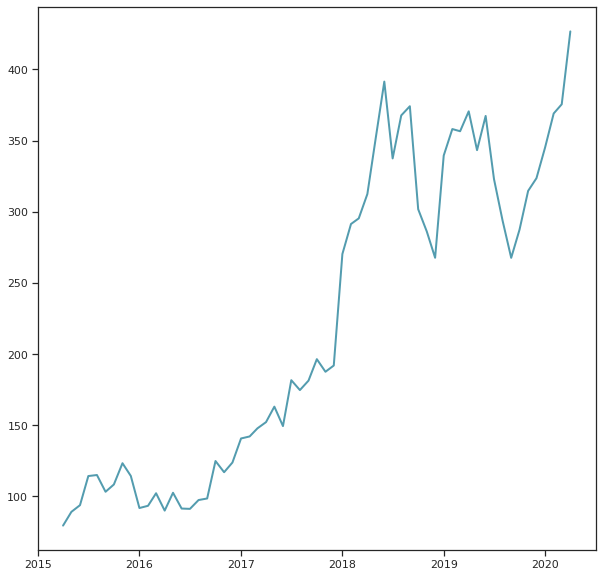

In [134]:
#@title Netflix stocks price
#nflx.set_index((nflx.index[::-1]))
newNFLX = nflx.reindex(index=nflx.index[::-1])
newNFLX.set_index((newNFLX.index[::-1]))

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(index, newNFLX['Цена'], lw = 2, color = '#539caf', alpha = 1)
plt.show()

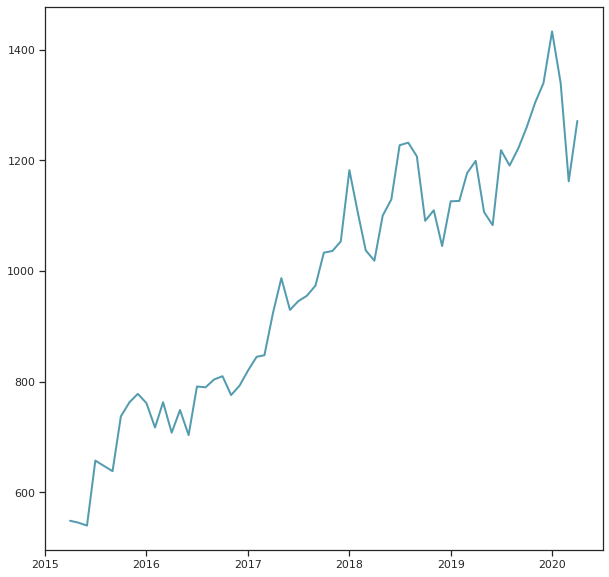

In [135]:
#@title Google stocks price
google = pd.read_csv('Google.csv.2')
rewriteRecord(google['Цена'])
rewriteRecord(google['Макс'])
rewriteRecord(google['Мин'])

#nflx.set_index((nflx.index[::-1]))
newGoogle = google.reindex(index=nflx.index[::-1])
newGoogle.set_index((newNFLX.index[::-1]))

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(index, newGoogle['Цена'], lw = 2, color = '#539caf', alpha = 1)
plt.show()

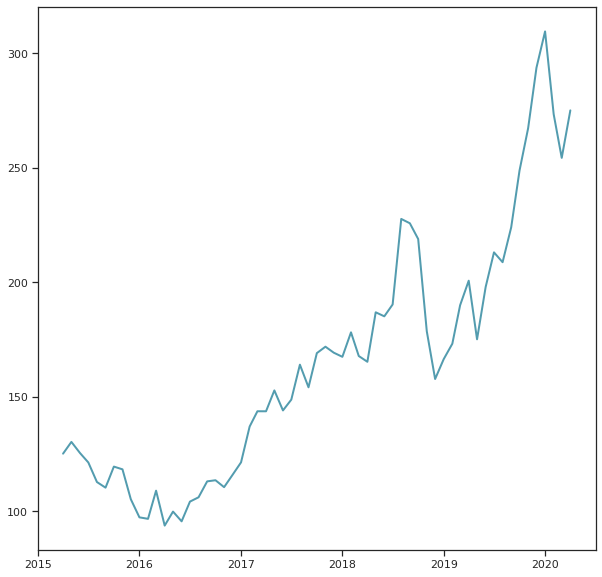

In [136]:
#@title Apple stocks price
apple = pd.read_csv('APPLE.csv')
rewriteRecord(apple['Цена'])
rewriteRecord(apple['Макс'])
rewriteRecord(apple['Мин'])

#nflx.set_index((nflx.index[::-1]))
newApple = apple.reindex(index=nflx.index[::-1])
newApple.set_index((newNFLX.index[::-1]))
newApple.set_index((newNFLX.index[::-1]))

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(index, newApple['Цена'], lw = 2, color = '#539caf', alpha = 1)
plt.show()